In [1]:
from typing import Union
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set_theme()
import cv2
from sklearn.cluster import DBSCAN
import math
from datetime import timedelta
from scipy.ndimage import convolve
from tqdm import tqdm

from src import dasly, helper

In [3]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
    # folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    # start='20231005 094335',
    # start='20231005 082445',
    # start='20231005 082445',
    # start='20230901 103035',  # full 2 lines
    # start='20230901 163110',  # part of lines
    # start='20230901 183015',  # noise
    # start='20230901 104035',  # 2 lines close to each other
    start='20230724 175906',  # 2 lines close to each other
    duration=10
)

Welcome to Dasly!
1 files, from 175906 to 175906


vmin: -6.24e-06, vmax: 6.24e-06


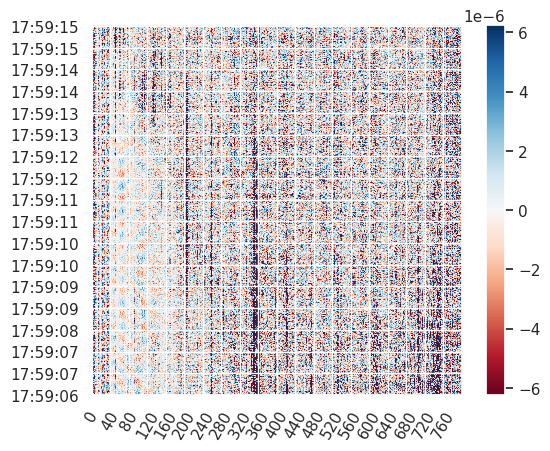

In [38]:
das.heatmap()

vmin: -1.05e-07, vmax: 1.05e-07


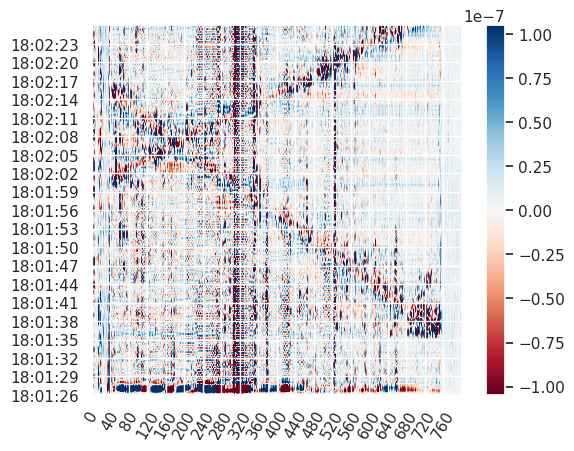

In [30]:
# forward filter
######################################################################
das.lowpass_filter(0.5)
das.heatmap()

Downsampling factor: 125
New sampling rate: 8
vmin: -1.04e-07, vmax: 1.04e-07


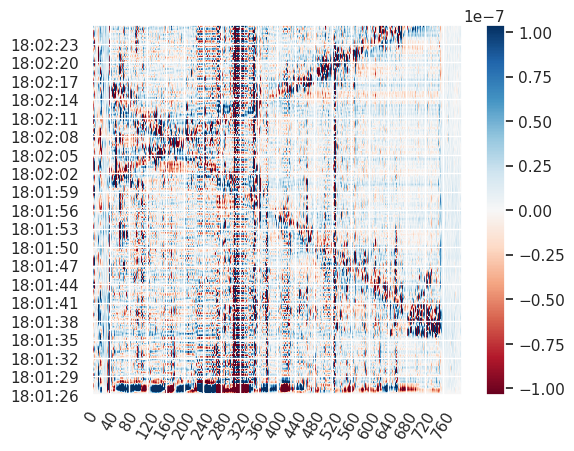

In [31]:
das.decimate(sampling_rate=6)
das.heatmap()

vmin: -2.27e-08, vmax: 2.27e-08


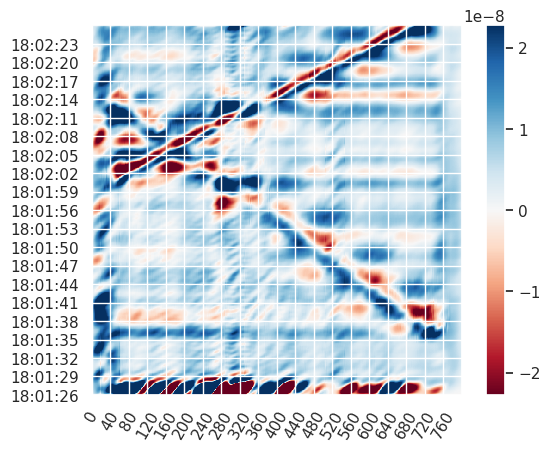

In [32]:
das.gauss_filter(80, 85)
das.heatmap()

vmax: 1.95e-08


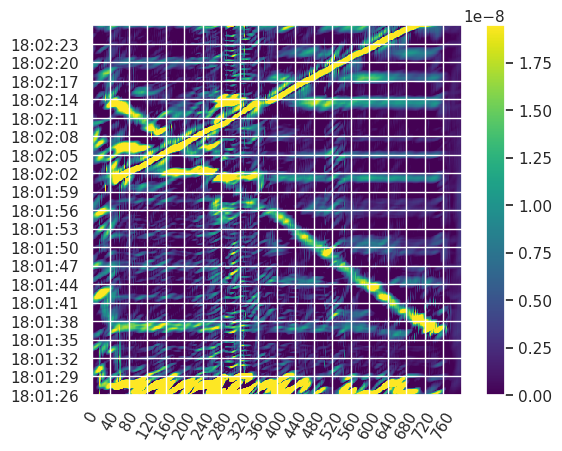

In [33]:
das.sobel_filter()
das.heatmap()

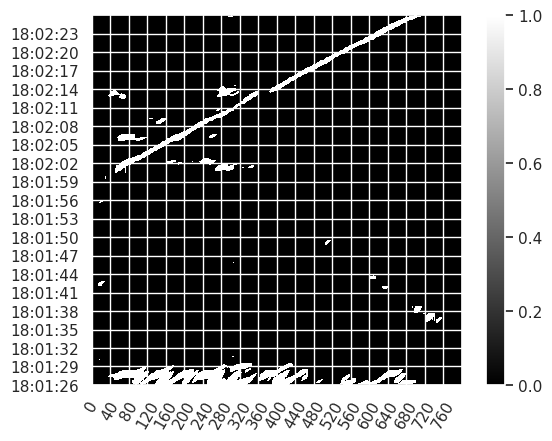

In [34]:
das.binary_filter(by_column=False, threshold=2.5e-8)
das.heatmap()

10 lines are detected


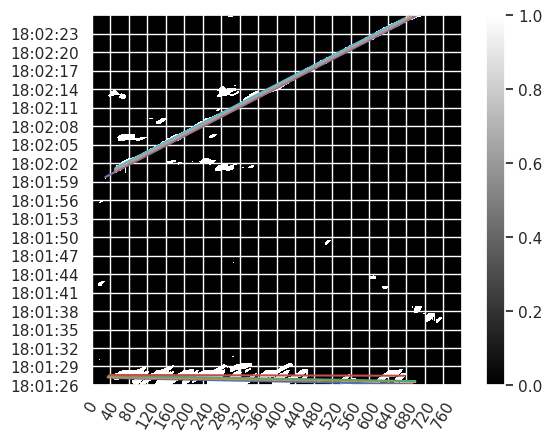

In [35]:
das.hough_transform(60*0.5)
das.heatmap()

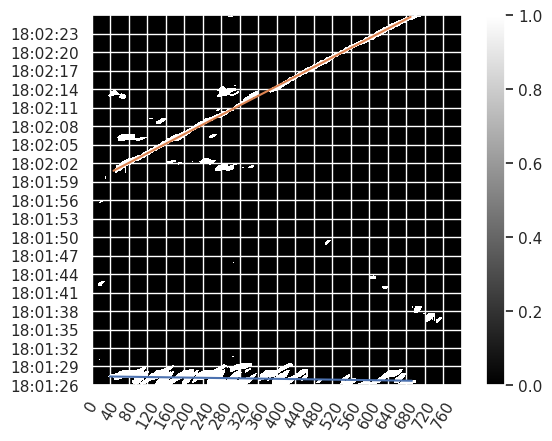

In [36]:
das.dbscan(1)
das.heatmap()

In [11]:
das.lines

,x1,y1,x2,y2,length,angle,speed,left,middle,right
0,57.500000,14.250000,666.000000,2.500000,608.614928,-0.019317,-1511.174266,2023-09-01 10:40:36.843749888,2023-09-01 10:40:35.875000064,2023-09-01 10:40:35.000000000
1,215.000000,11.000000,752.000000,200.000000,569.289030,0.338416,81.828571,2023-09-01 10:40:27.000000000,2023-09-01 10:40:44.500000000,2023-09-01 10:41:02.000000000
2,20.111111,293.777778,753.222222,294.555556,733.117785,0.001029,inf,2023-09-01 10:41:11.666666496,2023-09-01 10:41:11.722222336,2023-09-01 10:41:11.763888896
3,34.600000,372.200000,680.000000,379.800000,645.444926,0.011774,2456.022857,2023-09-01 10:41:21.400000000,2023-09-01 10:41:21.974999808,2023-09-01 10:41:22.600000000
4,34.000000,381.000000,747.000000,397.000000,713.179501,0.022437,1283.400000,2023-09-01 10:41:22.500000000,2023-09-01 10:41:23.624999936,2023-09-01 10:41:24.750000128
5,21.190476,289.476190,592.000000,478.761905,601.376211,0.320189,86.853738,2023-09-01 10:41:10.238095360,2023-09-01 10:41:26.833333504,2023-09-01 10:41:43.398809600
6,35.142857,412.714286,745.428571,405.285714,710.430721,-0.010376,5555.262306,2023-09-01 10:41:26.535714304,2023-09-01 10:41:26.053571328,2023-09-01 10:41:25.553571584
7,54.333333,414.000000,738.000000,450.333333,684.632096,0.053132,541.902703,2023-09-01 10:41:26.333333504,2023-09-01 10:41:28.958333184,2023-09-01 10:41:31.624999936
8,32.000000,464.666667,756.666667,435.000000,725.276004,-0.040918,-706.246226,2023-09-01 10:41:33.208333312,2023-09-01 10:41:31.124999936,2023-09-01 10:41:29.111110912
9,39.500000,462.500000,755.000000,473.500000,715.618257,0.015324,3138.400000,2023-09-01 10:41:32.687499776,2023-09-01 10:41:33.500000000,2023-09-01 10:41:34.250000128


,id


In [22]:
pd.concat([das.lines, pd.DataFrame()])

,x1,y1,x2,y2,length,angle,speed,left,middle,right,id
0,57.500000,14.250000,666.000000,2.500000,608.614928,-0.019317,-1511.174266,2023-09-01 10:40:36.843749888,2023-09-01 10:40:35.875000064,2023-09-01 10:40:35.000000000,NaN
1,215.000000,11.000000,752.000000,200.000000,569.289030,0.338416,81.828571,2023-09-01 10:40:27.000000000,2023-09-01 10:40:44.500000000,2023-09-01 10:41:02.000000000,NaN
2,20.111111,293.777778,753.222222,294.555556,733.117785,0.001029,inf,2023-09-01 10:41:11.666666496,2023-09-01 10:41:11.722222336,2023-09-01 10:41:11.763888896,NaN
3,34.600000,372.200000,680.000000,379.800000,645.444926,0.011774,2456.022857,2023-09-01 10:41:21.400000000,2023-09-01 10:41:21.974999808,2023-09-01 10:41:22.600000000,NaN
4,34.000000,381.000000,747.000000,397.000000,713.179501,0.022437,1283.400000,2023-09-01 10:41:22.500000000,2023-09-01 10:41:23.624999936,2023-09-01 10:41:24.750000128,NaN
5,21.190476,289.476190,592.000000,478.761905,601.376211,0.320189,86.853738,2023-09-01 10:41:10.238095360,2023-09-01 10:41:26.833333504,2023-09-01 10:41:43.398809600,NaN
6,35.142857,412.714286,745.428571,405.285714,710.430721,-0.010376,5555.262306,2023-09-01 10:41:26.535714304,2023-09-01 10:41:26.053571328,2023-09-01 10:41:25.553571584,NaN
7,54.333333,414.000000,738.000000,450.333333,684.632096,0.053132,541.902703,2023-09-01 10:41:26.333333504,2023-09-01 10:41:28.958333184,2023-09-01 10:41:31.624999936,NaN
8,32.000000,464.666667,756.666667,435.000000,725.276004,-0.040918,-706.246226,2023-09-01 10:41:33.208333312,2023-09-01 10:41:31.124999936,2023-09-01 10:41:29.111110912,NaN
9,39.500000,462.500000,755.000000,473.500000,715.618257,0.015324,3138.400000,2023-09-01 10:41:32.687499776,2023-09-01 10:41:33.500000000,2023-09-01 10:41:34.250000128,NaN


In [18]:
if 'aa' in globals():
    print("x is defined")

x is defined


In [21]:
old = das.lines.copy()
new = das.lines.copy()

In [23]:
dat = pd.concat([old.assign(id=range(len(old))), new])
dat

,x1,y1,x2,y2,length,angle,speed,left,middle,right,id
0,55.500000,0.000000,751.000000,14.500000,695.651143,0.020841,1381.782857,2023-09-01 10:40:14.937500160,2023-09-01 10:40:15.812499968,2023-09-01 10:40:16.875000064,0.0
1,90.500000,0.500000,756.166667,244.833333,709.091688,0.351785,78.463007,2023-09-01 10:40:10.999999744,2023-09-01 10:40:29.187500032,2023-09-01 10:40:47.562500096,1.0
2,31.333333,0.333333,747.833333,257.500000,761.253687,0.344592,80.242816,2023-09-01 10:40:13.687500032,2023-09-01 10:40:31.541666560,2023-09-01 10:40:49.458333440,2.0
3,42.000000,106.400000,750.400000,360.200000,752.492665,0.344026,80.385941,2023-09-01 10:40:26.349999872,2023-09-01 10:40:44.274999808,2023-09-01 10:41:02.175000064,3.0
4,10.777778,449.888889,741.777778,456.666667,731.032258,0.009186,3296.533333,2023-09-01 10:41:11.111111168,2023-09-01 10:41:11.611111168,2023-09-01 10:41:12.083333376,4.0
0,57.500000,14.250000,666.000000,2.500000,608.614928,-0.019317,-1511.174266,2023-09-01 10:40:36.843749888,2023-09-01 10:40:35.875000064,2023-09-01 10:40:35.000000000,NaN
1,215.000000,11.000000,752.000000,200.000000,569.289030,0.338416,81.828571,2023-09-01 10:40:27.000000000,2023-09-01 10:40:44.500000000,2023-09-01 10:41:02.000000000,NaN
2,20.111111,293.777778,753.222222,294.555556,733.117785,0.001029,inf,2023-09-01 10:41:11.666666496,2023-09-01 10:41:11.722222336,2023-09-01 10:41:11.763888896,NaN
3,34.600000,372.200000,680.000000,379.800000,645.444926,0.011774,2456.022857,2023-09-01 10:41:21.400000000,2023-09-01 10:41:21.974999808,2023-09-01 10:41:22.600000000,NaN
4,34.000000,381.000000,747.000000,397.000000,713.179501,0.022437,1283.400000,2023-09-01 10:41:22.500000000,2023-09-01 10:41:23.624999936,2023-09-01 10:41:24.750000128,NaN


In [31]:
def __metric(x: Union[np.array, list], y: Union[np.array, list]) -> float:
    distance = np.abs(np.array(x) - np.array(y)).mean()
    return distance


reference = datetime.now()
lines = (
    dat
    .assign(left_seconds=lambda df:
            (df['left'] - reference).dt.total_seconds())
    .assign(right_seconds=lambda df:
            (df['right'] - reference).dt.total_seconds())
    .assign(middle_seconds=lambda df:
            (df['middle'] - reference).dt.total_seconds())
)

cluster = DBSCAN(
    eps=1,
    min_samples=1,
    metric=__metric
)
cluster = cluster.fit(
    lines[['left_seconds', 'right_seconds', 'middle_seconds']])
(
    lines.assign(cluser=cluster.labels_)
    .loc[lambda df: df['speed'].between(-120, 120)]
    .assign(id=lambda df: df['id']*15)

)

,x1,y1,x2,y2,length,angle,speed,left,middle,right,id,left_seconds,right_seconds,middle_seconds,cluser
1,90.500000,0.500000,756.166667,244.833333,709.091688,0.351785,78.463007,2023-09-01 10:40:10.999999744,2023-09-01 10:40:29.187500032,2023-09-01 10:40:47.562500096,15.0,-2.017643e+07,-2.017639e+07,-2.017641e+07,1
2,31.333333,0.333333,747.833333,257.500000,761.253687,0.344592,80.242816,2023-09-01 10:40:13.687500032,2023-09-01 10:40:31.541666560,2023-09-01 10:40:49.458333440,30.0,-2.017643e+07,-2.017639e+07,-2.017641e+07,2
3,42.000000,106.400000,750.400000,360.200000,752.492665,0.344026,80.385941,2023-09-01 10:40:26.349999872,2023-09-01 10:40:44.274999808,2023-09-01 10:41:02.175000064,45.0,-2.017641e+07,-2.017638e+07,-2.017640e+07,3
1,215.000000,11.000000,752.000000,200.000000,569.289030,0.338416,81.828571,2023-09-01 10:40:27.000000000,2023-09-01 10:40:44.500000000,2023-09-01 10:41:02.000000000,NaN,-2.017641e+07,-2.017638e+07,-2.017640e+07,3
5,21.190476,289.476190,592.000000,478.761905,601.376211,0.320189,86.853738,2023-09-01 10:41:10.238095360,2023-09-01 10:41:26.833333504,2023-09-01 10:41:43.398809600,NaN,-2.017637e+07,-2.017634e+07,-2.017635e+07,8


In [50]:
import pandas as pd

# Sample DataFrame
data = {'aa': [1, 2, None, None, None, 5, None, None],
        'bb': ['A', 'B', 'A', 'A', 'C', 'C', 'D', 'D']}
df = pd.DataFrame(data)
df


,aa,bb
0,1.0,A
1,2.0,B
2,NaN,A
3,NaN,A
4,NaN,C
5,5.0,C
6,NaN,D
7,NaN,D


In [48]:
def impute_missing_aa(df):
    # Find rows with missing values in aa
    missing_aa_rows = df[df['aa'].isnull()]

    # # Find unique values in bb
    # unique_bb_values = df['bb'].unique()

    for row in missing_aa_rows.itertuples():
        index = row.Index
        bb_value = row.bb
        
        # Check if there are 2 or more rows with the same bb value
        if df['bb'].value_counts()[bb_value] >= 2:
            # Get the non-missing value of aa for the same bb
            non_missing_values = df[(df['bb'] == bb_value) & (~df['aa'].isnull())]['aa']
            if not non_missing_values.empty:
                non_missing_value = non_missing_values.iloc[0]
                df.at[index, 'aa'] = non_missing_value
            else:
                # If all values of aa for the same bb are missing, assign the biggest value in aa plus 1
                max_aa = df['aa'].max()
                df.at[index, 'aa'] = max_aa + 1
        else:
            # If no similar bb values, assign the biggest value in aa plus 1
            max_aa = df['aa'].max()
            df.at[index, 'aa'] = max_aa + 1

    return df

df = impute_missing_aa(df)
df

,aa,bb
0,1.0,A
1,2.0,B
2,1.0,A
3,1.0,A
4,5.0,C
5,5.0,C
6,6.0,D
7,6.0,D


In [51]:
df[df['aa'].isnull()]

,aa,bb
2,NaN,A
3,NaN,A
4,NaN,C
6,NaN,D
7,NaN,D


In [58]:
import pandas as pd

# Sample DataFrame
data = {'aa': [None, None, None, None, None, None, None, None],
        'bb': ['A', 'B', 'A', 'A', 'C', 'C', 'D', 'D']}
df = pd.DataFrame(data)
df

,aa,bb
0,None,A
1,None,B
2,None,A
3,None,A
4,None,C
5,None,C
6,None,D
7,None,D


In [55]:


def impute_missing_aa(df):
    # Find rows with missing values in aa
    missing_aa_rows = df[df['aa'].isnull()]

    # Find unique values in bb
    unique_bb_values = df['bb'].unique()

    for row in missing_aa_rows.itertuples():
        index = row.Index
        bb_value = row.bb
        
        # Check if there are 2 or more rows with the same bb value
        if df['bb'].value_counts()[bb_value] >= 2:
            # Get the non-missing value of aa for the same bb
            non_missing_values = df[(df['bb'] == bb_value) & (~df['aa'].isnull())]['aa']
            if not non_missing_values.empty:
                non_missing_value = non_missing_values.iloc[0]
                df.at[index, 'aa'] = non_missing_value
            else:
                # If all values of aa for the same bb are missing, assign the biggest value in aa plus 1
                max_aa = int(max(df['aa'], key=lambda x: int(x) if x else 0))
                df.at[index, 'aa'] = str(max_aa + 1)
        else:
            # If no similar bb values, assign the biggest value in aa plus 1
            max_aa = int(max(df['aa'], key=lambda x: int(x) if x else 0))
            df.at[index, 'aa'] = str(max_aa + 1)

    return df

df = impute_missing_aa(df)
print(df)

  aa bb
0  1  A
1  2  B
2  1  A
3  1  A
4  5  C
5  5  C
6  6  D
7  6  D


In [60]:
import pandas as pd
import uuid

# Sample DataFrame
data = {'aa': [None, None, None, None, None, None, None, None],
        'bb': ['A', 'B', 'A', 'A', 'C', 'C', 'D', 'D']}
df = pd.DataFrame(data)

def impute_missing_aa(df):
    # Find rows with missing values in aa
    missing_aa_rows = df[df['aa'].isnull()]

    # Find unique values in bb
    unique_bb_values = df['bb'].unique()

    for row in missing_aa_rows.itertuples():
        index = row.Index
        bb_value = row.bb
        
        # Check if there are 2 or more rows with the same bb value
        if df['bb'].value_counts()[bb_value] >= 2:
            # Get the non-missing value of aa for the same bb
            non_missing_values = df[(df['bb'] == bb_value) & (~df['aa'].isnull())]['aa']
            if not non_missing_values.empty:
                non_missing_value = non_missing_values.iloc[0]
                df.at[index, 'aa'] = non_missing_value
            else:
                # If all values of aa for the same bb are missing, assign a unique UUID
                unique_id = str(uuid.uuid4())
                df.at[index, 'aa'] = unique_id
        else:
            # If no similar bb values, assign a unique UUID
            unique_id = str(uuid.uuid4())
            df.at[index, 'aa'] = unique_id

    return df

df = impute_missing_aa(df)
print(df)


                                     aa bb
0  2cbf4ed8-04f7-4eb6-afde-6289d0304f32  A
1  df386714-1de4-4f2c-9891-50a2a8aaf07f  B
2  2cbf4ed8-04f7-4eb6-afde-6289d0304f32  A
3  2cbf4ed8-04f7-4eb6-afde-6289d0304f32  A
4  a240af0c-01a6-4076-98ac-1c543388e136  C
5  a240af0c-01a6-4076-98ac-1c543388e136  C
6  1e63a685-150f-4b19-86f3-48b68d8260c7  D
7  1e63a685-150f-4b19-86f3-48b68d8260c7  D


In [36]:
# Group by 'b', then fill NaNs in 'a' based on logic
def impute_missing(row):
    if pd.notna(row['a']):
        return row['a']
    else:
        similar_values = df[df['b'] == row['b']]['a'].dropna().unique()
        if len(similar_values) == 1:
            return similar_values[0]
        else:
            return df['a'].max() + 1

df['a'] = df.apply(impute_missing, axis=1)

print(df)

     a   b
0  1.0  10
1  2.0  20
2  8.0  30
3  4.0  20
4  8.0  40
5  8.0  40
6  7.0  50


In [11]:
das.lines

,x1,y1,x2,y2,length,angle,speed,left,middle,right
0,52.500000,0.000000,754.500000,14.5,702.149736,0.020650,1.394469e+03,2023-09-01 10:40:14.937500160,2023-09-01 10:40:15.812499968,2023-09-01 10:40:16.812499968
1,94.000000,0.000000,760.600000,247.8,711.168463,0.355903,7.747517e+01,2023-09-01 10:40:10.724999936,2023-09-01 10:40:29.149999872,2023-09-01 10:40:47.725000192
2,27.750000,0.750000,758.000000,261.0,775.238954,0.342355,8.081091e+01,2023-09-01 10:40:13.937499904,2023-09-01 10:40:31.593750016,2023-09-01 10:40:49.437499904
3,38.400000,106.200000,752.600000,360.4,758.089391,0.341942,8.091647e+01,2023-09-01 10:40:26.500000000,2023-09-01 10:40:44.274999808,2023-09-01 10:41:02.075000064
4,7.181818,455.181818,758.090909,455.0,750.911775,-0.000238,inf,2023-09-01 10:41:11.840909056,2023-09-01 10:41:11.829545216,2023-09-01 10:41:11.818181888
5,7.000000,477.000000,750.000000,478.0,743.000673,0.001346,2.139840e+04,2023-09-01 10:41:14.500000000,2023-09-01 10:41:14.624999936,2023-09-01 10:41:14.750000128


In [21]:
def __metric(x: Union[np.array, list], y: Union[np.array, list]) -> float:
    distance = np.abs(np.array(x) - np.array(y)).mean()
    return distance


reference = datetime.now()
lines = (
    pd.concat([old, new])
    .assign(left_seconds=lambda df:
            (df['left'] - reference).dt.total_seconds())
    .assign(right_seconds=lambda df:
            (df['right'] - reference).dt.total_seconds())
    .assign(middle_seconds=lambda df:
            (df['middle'] - reference).dt.total_seconds())
)

cluster = DBSCAN(
    eps=2,
    min_samples=1,
    metric=__metric
)
cluster = cluster.fit(
    lines[['left_seconds', 'right_seconds', 'middle_seconds']])
(
    lines.assign(cluser=cluster.labels_)
    # .groupby('cluser')
    # .mean()
    # .reset_index(drop=True)
)

,x1,y1,x2,y2,length,angle,speed,left,middle,right,id,left_seconds,right_seconds,middle_seconds,cluser
0,440.500000,6.000000,761.000000,131.000000,344.014262,0.371864,73.847005,2023-09-01 10:40:09.312499968,2023-09-01 10:40:28.812499968,2023-09-01 10:40:48.187500032,0.0,-2.017513e+07,-2.017510e+07,-2.017512e+07,0
1,84.071429,10.642857,652.000000,8.500000,567.936111,-0.003984,inf,2023-09-01 10:40:31.357142784,2023-09-01 10:40:31.133928704,2023-09-01 10:40:30.964285696,1.0,-2.017511e+07,-2.017511e+07,-2.017511e+07,1
2,373.500000,0.000000,750.500000,142.000000,402.860003,0.360209,76.477323,2023-09-01 10:40:12.468750080,2023-09-01 10:40:31.187500032,2023-09-01 10:40:50.031249920,2.0,-2.017513e+07,-2.017509e+07,-2.017511e+07,2
3,188.333333,38.333333,750.000000,240.666667,596.999495,0.345667,79.972390,2023-09-01 10:40:26.375000064,2023-09-01 10:40:44.291666688,2023-09-01 10:41:02.291666688,3.0,-2.017512e+07,-2.017508e+07,-2.017510e+07,3
4,107.636364,333.909091,689.000000,334.909091,581.384178,0.001465,inf,2023-09-01 10:41:11.704545536,2023-09-01 10:41:11.818181888,2023-09-01 10:41:11.886363648,4.0,-2.017507e+07,-2.017507e+07,-2.017507e+07,4
5,28.916667,352.000000,621.750000,363.750000,592.954252,0.020502,1460.681019,2023-09-01 10:41:13.875000064,2023-09-01 10:41:14.885416704,2023-09-01 10:41:15.906249984,5.0,-2.017507e+07,-2.017507e+07,-2.017507e+07,5
6,24.526316,375.526316,644.789474,394.578947,620.573618,0.030376,999.924072,2023-09-01 10:41:16.789473792,2023-09-01 10:41:18.309210368,2023-09-01 10:41:19.822368256,6.0,-2.017507e+07,-2.017506e+07,-2.017507e+07,6
7,64.540541,427.486486,661.972973,429.081081,597.481449,0.003113,418.934943,2023-09-01 10:41:23.327702528,2023-09-01 10:41:23.483108096,2023-09-01 10:41:23.641892096,7.0,-2.017506e+07,-2.017506e+07,-2.017506e+07,7
8,82.428571,457.928571,638.357143,475.285714,556.203001,0.030883,951.304553,2023-09-01 10:41:26.892857088,2023-09-01 10:41:28.428571392,2023-09-01 10:41:29.982142720,8.0,-2.017506e+07,-2.017505e+07,-2.017506e+07,8
0,440.500000,6.000000,761.000000,131.000000,344.014262,0.371864,73.847005,2023-09-01 10:40:09.312499968,2023-09-01 10:40:28.812499968,2023-09-01 10:40:48.187500032,NaN,-2.017513e+07,-2.017510e+07,-2.017512e+07,0


In [15]:
pd.concat([new, old])

,x1,y1,x2,y2,length,angle,speed,left,middle,right,id
0,440.500000,6.000000,761.000000,131.000000,344.014262,0.371864,73.847005,2023-09-01 10:40:09.312499968,2023-09-01 10:40:28.812499968,2023-09-01 10:40:48.187500032,NaN
1,84.071429,10.642857,652.000000,8.500000,567.936111,-0.003984,inf,2023-09-01 10:40:31.357142784,2023-09-01 10:40:31.133928704,2023-09-01 10:40:30.964285696,NaN
2,373.500000,0.000000,750.500000,142.000000,402.860003,0.360209,76.477323,2023-09-01 10:40:12.468750080,2023-09-01 10:40:31.187500032,2023-09-01 10:40:50.031249920,NaN
3,188.333333,38.333333,750.000000,240.666667,596.999495,0.345667,79.972390,2023-09-01 10:40:26.375000064,2023-09-01 10:40:44.291666688,2023-09-01 10:41:02.291666688,NaN
4,107.636364,333.909091,689.000000,334.909091,581.384178,0.001465,inf,2023-09-01 10:41:11.704545536,2023-09-01 10:41:11.818181888,2023-09-01 10:41:11.886363648,NaN
5,28.916667,352.000000,621.750000,363.750000,592.954252,0.020502,1460.681019,2023-09-01 10:41:13.875000064,2023-09-01 10:41:14.885416704,2023-09-01 10:41:15.906249984,NaN
6,24.526316,375.526316,644.789474,394.578947,620.573618,0.030376,999.924072,2023-09-01 10:41:16.789473792,2023-09-01 10:41:18.309210368,2023-09-01 10:41:19.822368256,NaN
7,64.540541,427.486486,661.972973,429.081081,597.481449,0.003113,418.934943,2023-09-01 10:41:23.327702528,2023-09-01 10:41:23.483108096,2023-09-01 10:41:23.641892096,NaN
8,82.428571,457.928571,638.357143,475.285714,556.203001,0.030883,951.304553,2023-09-01 10:41:26.892857088,2023-09-01 10:41:28.428571392,2023-09-01 10:41:29.982142720,NaN
0,440.500000,6.000000,761.000000,131.000000,344.014262,0.371864,73.847005,2023-09-01 10:40:09.312499968,2023-09-01 10:40:28.812499968,2023-09-01 10:40:48.187500032,0.0


In [14]:
old

,x1,y1,x2,y2,length,angle,speed,left,middle,right,id
0,440.500000,6.000000,761.000000,131.000000,344.014262,0.371864,73.847005,2023-09-01 10:40:09.312499968,2023-09-01 10:40:28.812499968,2023-09-01 10:40:48.187500032,0
1,84.071429,10.642857,652.000000,8.500000,567.936111,-0.003984,inf,2023-09-01 10:40:31.357142784,2023-09-01 10:40:31.133928704,2023-09-01 10:40:30.964285696,1
2,373.500000,0.000000,750.500000,142.000000,402.860003,0.360209,76.477323,2023-09-01 10:40:12.468750080,2023-09-01 10:40:31.187500032,2023-09-01 10:40:50.031249920,2
3,188.333333,38.333333,750.000000,240.666667,596.999495,0.345667,79.972390,2023-09-01 10:40:26.375000064,2023-09-01 10:40:44.291666688,2023-09-01 10:41:02.291666688,3
4,107.636364,333.909091,689.000000,334.909091,581.384178,0.001465,inf,2023-09-01 10:41:11.704545536,2023-09-01 10:41:11.818181888,2023-09-01 10:41:11.886363648,4
5,28.916667,352.000000,621.750000,363.750000,592.954252,0.020502,1460.681019,2023-09-01 10:41:13.875000064,2023-09-01 10:41:14.885416704,2023-09-01 10:41:15.906249984,5
6,24.526316,375.526316,644.789474,394.578947,620.573618,0.030376,999.924072,2023-09-01 10:41:16.789473792,2023-09-01 10:41:18.309210368,2023-09-01 10:41:19.822368256,6
7,64.540541,427.486486,661.972973,429.081081,597.481449,0.003113,418.934943,2023-09-01 10:41:23.327702528,2023-09-01 10:41:23.483108096,2023-09-01 10:41:23.641892096,7
8,82.428571,457.928571,638.357143,475.285714,556.203001,0.030883,951.304553,2023-09-01 10:41:26.892857088,2023-09-01 10:41:28.428571392,2023-09-01 10:41:29.982142720,8


In [20]:
def calculate_intersection(x1, y1, x2, y2, image_height, image_width):
    # Calculate slope (m) and intercept (b) of the line
    if x2 - x1 != 0:
        m = (y2 - y1) / (x2 - x1)
        b = y1 - m * x1
    else:
        # Handle case where the line is vertical (x1 == x2)
        m = float('inf')
        b = None

    # Initialize intersection points
    intersections = []

    # Calculate intersections with image edges
    if m != 0 and m != float('inf'):
        # Intersection with top edge (y = 0)
        x = -b / m
        if 0 <= x <= image_width:
            intersections.append((x, 0))

        # Intersection with bottom edge (y = image_height)
        x = (image_height - b) / m
        if 0 <= x <= image_width:
            intersections.append((x, image_height))
    else:
        # Handle horizontal and vertical lines
        if m == 0:
            intersections.append((0, y1))
            intersections.append((image_width, y1))
        else:  # Vertical line
            intersections.append((x1, 0))
            intersections.append((x1, image_height))

    return intersections

# Example usage
lines = [(100, 200, 300, 400), (500, 100, 700, 600)]  # Example lines
image_height = 1000
image_width = 800

for line in lines:
    x1, y1, x2, y2 = line
    intersections = calculate_intersection(x1, y1, x2, y2, image_height, image_width)
    print("Intersections for line", line, ":", intersections)


Intersections for line (100, 200, 300, 400) : []
Intersections for line (500, 100, 700, 600) : [(460.0, 0)]


In [21]:
import numpy as np

def calculate_intersections(rho, theta, image_height, image_width):
    intersections = []
    
    if np.sin(theta) != 0:  # Line is not vertical
        # Calculate intersections with left and right edges of the image
        y_left = 0
        y_right = image_width - 1
        x_left = (rho - y_left * np.sin(theta)) / np.cos(theta)
        x_right = (rho - y_right * np.sin(theta)) / np.cos(theta)
        intersections.append((int(x_left), y_left, int(x_right), y_right))

    if np.cos(theta) != 0:  # Line is not horizontal
        # Calculate intersections with top and bottom edges of the image
        x_top = 0
        x_bottom = image_height - 1
        y_top = (rho - x_top * np.cos(theta)) / np.sin(theta)
        y_bottom = (rho - x_bottom * np.cos(theta)) / np.sin(theta)
        intersections.append((x_top, int(y_top), x_bottom, int(y_bottom)))

    return intersections

# Example usage:
rho = 100  # Example value of rho
theta = np.pi / 4  # Example value of theta
image_height = 1000
image_width = 800

intersections = calculate_intersections(rho, theta, image_height, image_width)
print(intersections)


[(141, 0, -657, 799), (0, 141, 999, -857)]


In [18]:
def calculate_intersection(x1, y1, x2, y2, image_width, image_height):
    intersections = []

    # Calculate slope of the line
    if x2 - x1 != 0:
        slope = (y2 - y1) / (x2 - x1)
    else:
        slope = float('inf')

    # Intersection with top edge
    if y1 < 0:
        x = x1 - (y1 / slope)
        intersections.append((x, 0))

    # Intersection with bottom edge
    if y2 > image_height:
        x = x1 + ((image_height - y1) / slope)
        intersections.append((x, image_height))

    # Intersection with left edge
    if x1 < 0:
        y = y1 - (x1 * slope)
        intersections.append((0, y))

    # Intersection with right edge
    if x2 > image_width:
        y = y1 + ((image_width - x1) * slope)
        intersections.append((image_width, y))

    return intersections

# Example usage
image_width = 800
image_height = 1000
x1, y1, x2, y2 = 0, 0, 1, 1  # Example line
intersections = calculate_intersection(x1, y1, x2, y2, image_width, image_height)
print(intersections)


[]


In [19]:
import numpy as np

def line_intersection(line1, line2):
    # Calculate intersection point of two lines
    xdiff = (line1[0] - line1[2], line2[0] - line2[2])
    ydiff = (line1[1] - line1[3], line2[1] - line2[3])

    div = np.linalg.det([xdiff, ydiff])
    if div == 0:
        return None  # Lines are parallel or coincident

    d = (np.linalg.det([line1[:2], line1[2:]]), np.linalg.det([line2[:2], line2[2:]]))
    x = np.linalg.det([d, xdiff]) / div
    y = np.linalg.det([d, ydiff]) / div
    return x, y

def find_intersections(lines, image_shape):
    intersections = []
    rows, cols = image_shape
    # Image edges
    top_edge = [(0, 0), (cols, 0)]
    bottom_edge = [(0, rows), (cols, rows)]
    left_edge = [(0, 0), (0, rows)]
    right_edge = [(cols, 0), (cols, rows)]
    edges = [top_edge, bottom_edge, left_edge, right_edge]

    for line in lines:
        for edge in edges:
            intersection = line_intersection(line, edge)
            if intersection is not None:
                intersections.append(intersection)

    return intersections

# Example usage
image_shape = (1000, 800)
hough_lines = [(100, 200, 500, 700), (300, 100, 700, 600)]  # Example Hough transform output
intersections = find_intersections(hough_lines, image_shape)

print("Intersection points:")
for point in intersections:
    print(point)


IndexError: list index out of range

In [3]:
def calculate_intersections(lines, image_height, image_width):
    intersections = []
    
    for line in lines:
        x1, y1, x2, y2 = line
        
        # Calculate slope of the line
        if x2 - x1 != 0:
            slope = (y2 - y1) / (x2 - x1)
        else:
            slope = float('inf')

        # Intersection with top edge
        if y1 < 0:
            x = x1 - (y1 / slope)
            intersections.append((x, 0))

        # Intersection with bottom edge
        if y2 > image_height:
            x = x1 + ((image_height - y1) / slope)
            intersections.append((x, image_height))

        # Intersection with left edge
        if x1 < 0:
            y = y1 - (x1 * slope)
            intersections.append((0, y))

        # Intersection with right edge
        if x2 > image_width:
            y = y1 + ((image_width - x1) * slope)
            intersections.append((image_width, y))

    return intersections

# Example usage
image_height = 1000
image_width = 800
lines = [(0, 0, 1, -1), (1, 1, 1, 1)]  # Example lines

intersections = calculate_intersections(lines, image_height, image_width)
print(intersections)


[]


In [ ]:
das.hough_transform()

In [30]:
das.lines

,x1,y1,x2,y2,length,angle,speed,left,middle,right
0,42,0,330,0,288.000000,0.000000,inf,2023-09-01 10:30:35.000,2023-09-01 10:30:35.000,2023-09-01 10:30:35.000
1,43,3,353,2,310.001613,-0.003226,-8.928000e+03,2023-09-01 10:30:35.375,2023-09-01 10:30:35.125,2023-09-01 10:30:35.000
2,42,1,351,1,309.000000,0.000000,inf,2023-09-01 10:30:35.125,2023-09-01 10:30:35.125,2023-09-01 10:30:35.125
3,337,3,575,1,238.008403,-0.008403,-3.427200e+03,2023-09-01 10:30:35.625,2023-09-01 10:30:35.250,2023-09-01 10:30:35.000
4,44,4,619,3,575.000870,-0.001739,-1.656000e+04,2023-09-01 10:30:35.500,2023-09-01 10:30:35.375,2023-09-01 10:30:35.250
5,29,9,312,5,283.028267,-0.014133,-2.037600e+03,2023-09-01 10:30:36.125,2023-09-01 10:30:35.375,2023-09-01 10:30:34.875
6,31,11,361,5,330.054541,-0.018180,-1.584000e+03,2023-09-01 10:30:36.375,2023-09-01 10:30:35.500,2023-09-01 10:30:34.750
7,33,12,424,5,391.062655,-0.017901,-1.608686e+03,2023-09-01 10:30:36.500,2023-09-01 10:30:35.625,2023-09-01 10:30:34.875
8,36,14,387,7,351.069794,-0.019940,-1.444114e+03,2023-09-01 10:30:36.750,2023-09-01 10:30:35.750,2023-09-01 10:30:34.875
9,38,15,615,1,577.169819,-0.024259,-1.186971e+03,2023-09-01 10:30:36.875,2023-09-01 10:30:35.750,2023-09-01 10:30:34.625


In [40]:
def __metric(x: Union[np.array, list], y: Union[np.array, list]) -> float:
    distance = np.abs(np.array(x) - np.array(y)).mean()
    return distance


reference = das.start.to_pydatetime()
lines = (
    das.lines
    .assign(left_seconds
            =lambda df: (df['left'] - reference).dt.total_seconds())
    .assign(right_seconds=
            lambda df: (df['right'] - reference).dt.total_seconds())
    .assign(middle_seconds=
            lambda df: (df['middle'] - reference).dt.total_seconds())
)

cluster = DBSCAN(
    eps=1,
    min_samples=1,
    metric=__metric
)

cluster = cluster.fit(lines[['left_seconds', 'right_seconds', 'middle_seconds']])

In [41]:
cluster = DBSCAN(
            eps=1,
            min_samples=1,
            metric=__metric
        )

cluster = cluster.fit(lines[['left_seconds', 'right_seconds', 'middle_seconds']])

In [42]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2])

In [46]:
(
    das.lines.assign(cluser=cluster.labels_)
    .groupby('cluser')
    .mean()
    .reset_index(drop=True)
)

,x1,y1,x2,y2,length,angle,speed,left,middle,right
0,62.153846,9.461538,395.000000,4.923077,332.893179,-0.014112,inf,2023-09-01 10:30:36.221153792,2023-09-01 10:30:35.519230976,2023-09-01 10:30:34.903846400
1,420.285714,68.285714,634.857143,68.571429,214.572054,0.001251,inf,2023-09-01 10:30:43.464285696,2023-09-01 10:30:43.535714304,2023-09-01 10:30:43.607142912
2,85.750000,4.250000,296.250000,74.750000,221.993146,0.323214,85.988445,2023-09-01 10:30:31.968750080,2023-09-01 10:30:48.656249856,2023-09-01 10:31:05.375000064


In [29]:
reference = datetime.strptime('2023-10-05 08:24:45', '%Y-%m-%d %H:%M:%S')
reference

datetime.datetime(2023, 10, 5, 8, 24, 45)

In [27]:
type(reference)

datetime.datetime

In [21]:
datetime.now()

datetime.datetime(2024, 4, 21, 11, 4, 12, 520164)

In [28]:
das.start.to_pydatetime()

datetime.datetime(2023, 9, 1, 10, 30, 35)

In [14]:
def line_intersection(line1, line2):
    # Get the coordinates
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    
    # Calculate the intersection point
    denominator = (x1-x2) * (y3-y4) - (y1-y2) * (x3-x4)
    if denominator == 0:  # Lines are parallel
        return None
    px = ((x1*y2 - y1*x2) * (x3-x4) - (x1-x2) * (x3*y4 - y3*x4)) / denominator
    py = ((x1*y2 - y1*x2) * (y3-y4) - (y1-y2) * (x3*y4 - y3*x4)) / denominator
    
    return px, py

def intersection_with_edges(image_size, line):
    rows, cols = image_size
    x1, y1, x2, y2 = line
    
    # Top edge intersection
    top_intersection = line_intersection((x1, y1, x2, y2), (0, 0, cols, 0))
    
    # Bottom edge intersection
    bottom_intersection = line_intersection((x1, y1, x2, y2), (0, rows, cols, rows))
    
    # Left edge intersection
    left_intersection = line_intersection((x1, y1, x2, y2), (0, 0, 0, rows))
    
    # Right edge intersection
    right_intersection = line_intersection((x1, y1, x2, y2), (cols, 0, cols, rows))
    
    # Filter out None intersection points and keep those within image bounds
    intersections = [point for point in [top_intersection, bottom_intersection, left_intersection, right_intersection] if point is not None and 0 <= point[0] <= cols and 0 <= point[1] <= rows]
    
    return intersections

# Example usage:
hough_lines = [(0, 1, 2, 2), (0, 1, 10, 10)]  # Example hough transform output
image_size = (800, 800)  # Image size

intersection_points = []
for line in hough_lines:
    intersections = intersection_with_edges(image_size, line)
    intersection_points.extend(intersections)

print("Intersection Points:")
for point in intersection_points:
    print(point)


Intersection Points:
(0.0, 1.0)
(800.0, 401.0)
(0.0, 1.0)
(800.0, 721.0)


In [1]:
import cv2
import numpy as np

# Load the image
image = das.signal
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Run Hough transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the result
cv2.imshow('Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'das' is not defined